# Úvod do Pandas

[Pandas](https://pandas.pydata.org/) je rozšírená open-source Python knižnica, ktorá ponúka štruktúrya funkcie na 
analýzu dát. Hlavným cieľom tejto knižnice je poskutnúť pokročilú dátovú analytiku s minimom programovania.

V praxi sa jedná o tabuľku, ktorá sa volá `DataFrame`, ktorá obsahuje naše dáta, nad ktorou vieme vykonávať rôzne 
operácie.

Pre naše potešenie je celá knižnica detailne zdokumentovaná na nasledovnom odkaze:
[Pandas Docs](https://pandas.pydata.org/pandas-docs/stable/). Dokumentácia je vždy náš najlepší kamoš.

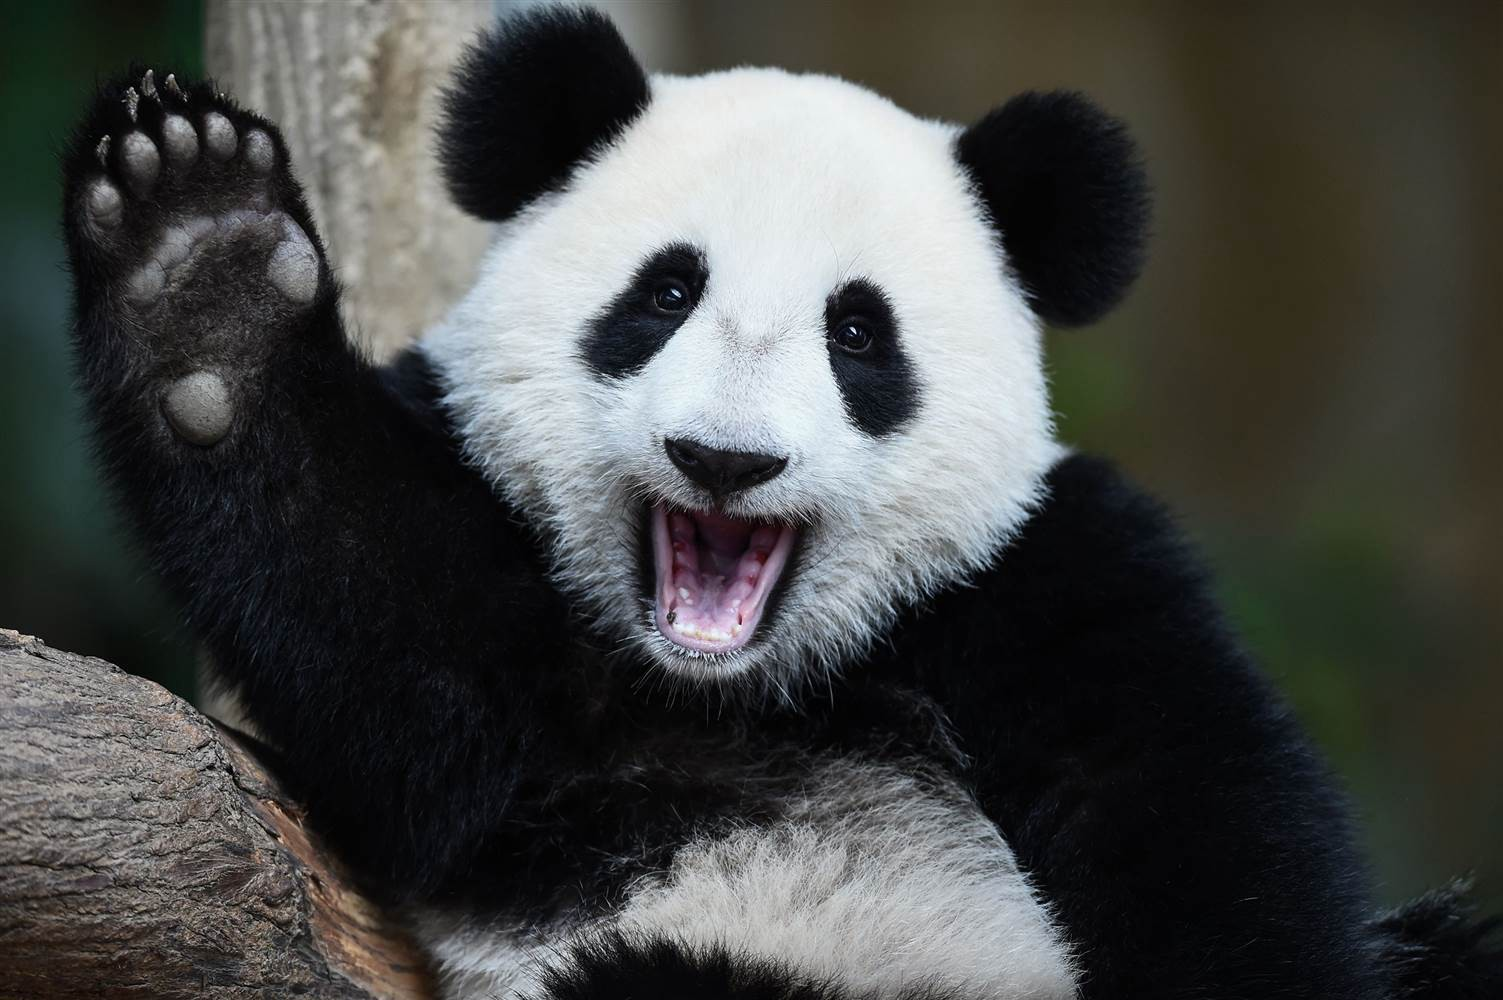

Predtým ako začneme pracovať, musíme Python-u povedať, že cheme s Pandas pracovať:


In [ ]:
! pip install matplotlib --upgrade
! pip install numpy --upgrade
! pip install pandas --upgrade


In [ ]:
# Import knižníc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Schovaj nudné upozornenia
import warnings
warnings.filterwarnings('ignore')


Python už vie, že sa chceme hrať s Pandas, teraz si potrebujeme vytvoriť dataframe (`df`) s našimi dátami.

Pandas má na to hneď niekoľko možností (záleží v akej forme sme dáta dostali):

- [pandas.read_csv()](http://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.read_csv.html): CSV súbory
- [pandas.read_excel()](http://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.read_excel.html#pandas.read_excel): Excel
- [pandas.read_json()](http://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.read_json.html#pandas.read_json): JSON


Náš prvý dataset som pripravil vo formáte CSV (Comma separated values), jedná sa o jednoduchý textový súbor, kde sú
hodnoty oddelené čiarkou, prípadne iným jednoznakovým oddelovačom (napríklad `;`, ` `, `|`, `,`).

In [ ]:
df = pd.read_csv('../data/bmi.csv', sep=';')
df

## Prvotná analýza

Už máme načítané dáta v premennej `df`, teraz ideme postupne objavovať čo všetko nám vedia povedať. Je dobrým zvykom
začať zistením aké dáta máme, ako vyzerajú a koľko ich je. K tomu nám pomôžu nasledujúce atribúty a funkcie:

- [pandas.DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html): 
Základné informácie o tabuľke
- [pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html):
Rozmer tabuľky
- [pandas.DataFrame.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html):
Prvých 5 záznamov v tabuľke
- [pandas.DataFrame.tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html):
Posledných 5 záznamov v tabuľke
- [pandas.DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Jedna z výhod Jupyter Notebooks je, že dokážu veľmi efektívne pracovať s pandas DataFrames, napríklad stačí iba zavolať
názov premennej ktorá obsahuje DataFrame (napríklad `df`) a Jupyter rovno vykreslí celú tabuľku.


In [ ]:
# df.info()
# df.shape
# df.head()
# df.tail()
# df.describe()

## Príprava dát

Predtým ako začneme reálnu analýzu, musíme sa pozrieť aké máme k dispozícii dáta a či sú v správnej forme. Aby sme
zabezpečili čo najväčšiu presnosť našich zistení a záverov, musíme odstrániť neuplné alebo poškodené dáta, prípadne 
upraviť stĺpce do dobre čitateľnej podoby.

Ako prvú vec, čo si všimnem je, že prvý stĺpec je nejaký divný a nemá pre nás žiadnu špeciálnu hodnotu, dáme ho preč.

Pomôžeme si prístupom cez konštrukciu 
[pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)


In [ ]:
df = df.iloc[:, 1:]
df.info()

Každá tabuľka potrebuje nejaké referenčné body, musíme mať správne označené stĺpce a niekedy nám príde vhodné aj správne
pomenovať riadky. Napríklad, všetky údaje v riadku sa týkajú jednej osoby, ktorá je identifikovaná svojím menom.

V pandas sa niečo takéto volá index, vytvorme si teda index pre riadok na základe stĺpca `Name`.

- [pandas.DataFrame.set_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)


In [ ]:
df = df.set_index(['Name'])
df.head()

Je vždy dobré pre kalkuláciou pozrieť sa, či namerané hodnoty dávajú zmysel. Napríklad, ak máme nejaké nulové alebo 
záporné hodnoty, s vysokou pravdepodobnosťou je to chyba merania. Tieto dáta pre nás strácajú zmysel.

Pokúsime sa najprv takéto hodnoty nájsť, teraz to skúsime cez konštrukciu 
[pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
ktorá pristupuje k dátam tabuľky cez názvy stĺpcov a indexov.


In [ ]:
mask = (df['Height'] < 0) | (df['Weight'] < 0)
df.loc[mask]

df['Height'][df['Height'] < 0] = np.NaN
df['Weight'][df['Weight'] < 0] = np.NaN

Už naše dáta vyzerajú v poriadku, môžeme začať počítať BMI. 

Potom ako ho vypočítame, odstránime neplatné záznamy a zoradíme tabuľku podľa stĺpca `BMI`.

- [pandas.DataFrame.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
- [pandas.DataFrame.sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [ ]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df = df.dropna()
df = df.sort_values(by=['BMI'])

Na základe BMI, vieme ľudí zaradiť minimálne do troch kategórií:

- Podváha (`BMI < 20`)
- Normálna hmotnosť (`BMI >= 20 and BMI < 25`)
- Nadváha (`BMI >= 25`)

Vytvorme teda stĺpec `BMI Category`, ktorú bude hovoriť o hrdinovy do akej kategórie spadá.


In [ ]:
df['Category'] = np.NaN
df['Category'][df['BMI'] < 20] = 'Podváha'
df['Category'][(df['BMI'] >= 20) & (df['BMI'] < 25)] = 'Normálna hmotnosť'
df['Category'][df['BMI'] >= 25] = 'Nadváha'

## Analýza

Už máme vypočítané všetky potrebné dáta, môžeme začať klásť otázky a kresliť grafy.

### Ako tažké je vôbec nakresliť graf?

- [pandas.DataFrame.plot.bar()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

In [ ]:
# 1. Ako tažké je nakresliť graf?
df.plot.bar(y='BMI')

### Koľko superhrdinov trpí nadváhou? 
Identifikujte koľko superhrdinov trpí nadváhou a vykreslite ich v tabuľke.

Nápoveda: K stĺpcu sa pristupuje nasledovnou notáciou: `df.<stlpec>`. Návratová hodnota je typu [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

- [pandas.Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
- [pandas.Series.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html)

In [ ]:
df.loc[df['Category'] == 'Nadváha']
df.Category.value_counts()
df.Category.describe()

### Ako by vyzeral koláčový graf podľa kategórií?

- [pandas.Series.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

In [ ]:
# 3. Koláčový graf (Pie chart) váhových kategórií 
df.Category.value_counts().plot(kind='pie')